 # Espectro de potencias

Calcular el espectro de pontencias usando 20 bins en k en
cada dirección (kx y ky), con la siguiente expresión:

$P(k)\; = V \; | \; \frac{1}{N} \sum_{i=gal}^{N} \exp^{ik ^. x} \; | \;^2 $

Expandiento en componentes el exponencial:

$P(k)\; = V \; | \; \frac{1}{N} \sum_{i=gal}^{N} \exp^{ik_{x}x}  \exp^{ik_{y}y} \; | \;^2 $


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
%matplotlib inline

In [2]:
# Función con lo que se obtiene una distribución uniforme de una caja de lado L,
# dim es la dimesion para 2D o 3D, N es el numero de datos
def caja(dim,L,N):
    return np.random.random((dim, N))*L-0.5*L

In [3]:
# Función con lo que se obtiene una distribución uniforme de un anillo

# Input values: r es el radio mayor, r1 el radio menor, N numero de puntos
def anillo(r,r1,N):
    anillo = []
    i=0
    dim=2
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if (r_test <= r and r_test >= r1 ):
            anillo.append(point)
            i+=1
    anillo = np.array(anillo)
    anillo = anillo.T
    return anillo # Regresa los punTos dentro del circulo

In [4]:
# Definición del espectro de potencias

def pk(x,y,kx,ky,N,V):
    pot = []
    for i in range(len(kx)):
        exp = np.exp(1j*(kx[i]*x+ky[i]*y))
        sumexp = exp.sum()/N
        abs2 = np.absolute(sumexp)**2
        pk = V*abs2-V/N
        pot.append(pk)
    pot = np.array(pot)
    return pot

### Aplicando las definiciones generamos datos del anillo 

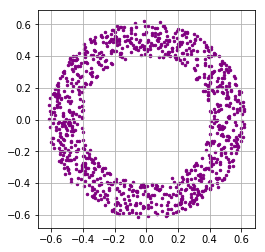

In [5]:
# Elegimos el radio mayor del anillo para que en proyección a 3D ocupe un volumen = 1
r,r1,ND= .62035,.40,1000
bins = np.linspace(0,2*r,100)

# Generando Datos normales y datos random
D = anillo(r,r1,ND)
R = caja(2,1.,1000)
# Graficando los datos
x,y = D
#xr,yr = R
plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x,y,color='purple',s=6)

ax.grid()
plt.legend()
plt.show()

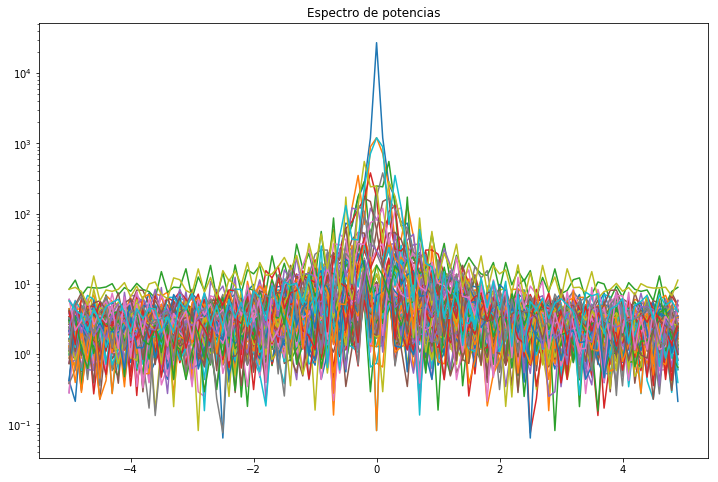

In [6]:
# Malla objetivo a interpolar
xi = yi = np.linspace(-1.,1.,100)
X,Y = np.meshgrid(xi,yi)

# Definiendo una funcion que sera la densidad para cada punto
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

# Densidad para los puntos de la malla
Z = f(X, Y)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].contourf(X, Y, Z)
ax[0].scatter(D[0], D[1], c='k', alpha=0.5, marker='.') # Puntos que corresponden al anillo
ax[0].set_title('Densidad para la malla y anillo')
ax[0].set_aspect('equal')

Ti = griddata((D[0], D[1]), f(D[0],D[1]), (X, Y), method='nearest')
ax[1].contourf(X, Y, Ti)
ax[1].set_title('Interpolacion = {}'.format('nearest'))
ax[1].set_aspect('equal')

# Ahora calculamos el espectro de potencias usando la transformada de fourier

# Transformada de fourier en 2D
ft = np.abs(np.fft.fft2(Ti))

# Graficando el espectro de potencias
time_step = 1./10 # Periodo
freqs = np.fft.fftfreq(np.shape(Ti)[0], time_step) # Frecuencias
idx = np.argsort(freqs)
plt.clf()
plt.figure(figsize=(12,8))
plt.semilogy(freqs[idx], ft[idx])
plt.title('Espectro de potencias')
plt.show()

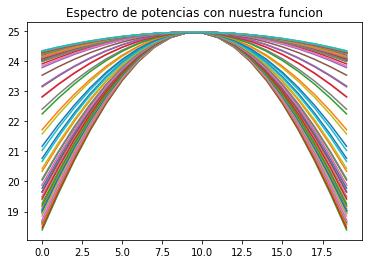

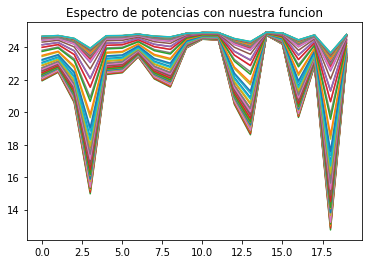

In [7]:
#  Usando nuestra definición del Espectro de potencias

# Calculo del espectro de potencias de la interpolacion Ti

V=1.
N = 20

# Las componentes kx las definiremos como un arreglo que va de -r a r con 20 elementos
kx = ky = np.linspace(-r,r,20)


for i in range(np.shape(Ti)[1]):
    p_k = pk(Ti[i][:],Ti[i][:],kx,ky,N,V)
    plt.plot(p_k)
plt.title('Espectro de potencias con nuestra funcion')
plt.show()

# Las componentes kx las definiremos como un arreglo que va de -r a r con 20 elementos
kx = np.random.rand(20)
ky = np.random.rand(20)
for i in range(np.shape(Ti)[1]):
    p_k = pk(Ti[i][:],Ti[i][:],kx,ky,N,V)
    plt.plot(p_k)
plt.title('Espectro de potencias con nuestra funcion')
plt.show()




Observamos que dependiendo de como definamos kx, ky obtendremos resultados diferentes.